# TD Théorie de l'information 1

## Etude de la fonction $x.log_2(x)$

## Graphe de la fonction

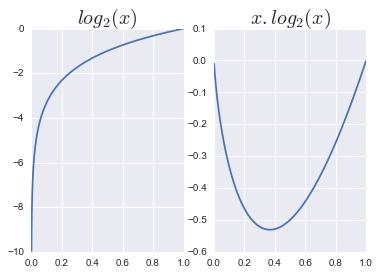

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import numpy as np
from math import *
from sympy import init_printing

init_printing()

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

x=np.linspace(0.000,1,1000)
ax1.plot(x,np.log2(x))  # utiliser np. car c'est la fonction log2 vectorisée de numpy
#ax1.ylabel("$log_2(x)$")
#ax1.xlabel("$x$")
ax1.set_title("$ log_2(x) $",fontsize=20)
ax2.plot(x,x*np.log2(x))  # utiliser np. car c'est la fonction log2 vectorisée de numpy
ax2.set_title("$ x.log_2(x)$",fontsize=20)


 se rappeler que $\lim_{x\to0} x.ln(x)=0$ et $\log_2(x)=\frac{ln(x)}{ln(2)}$

## Calcul de la dérivée

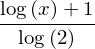

In [25]:
from sympy import * # Librarie de calcul symbolique 
x = symbols('x')
from IPython.display import display
# ci-dessous on re-ecrit log2(x) comme log(x)/log(2) pour aider sympy
display(simplify(diff(x*log(x)/log(2), x)) )  # Calcul de la derivee

## Trouver quand cette dérivée s'annule

In [ ]:
t=np.linspace(0.01,1,100)
plt.plot(t,(np.log(t)+1)/np.log(2))  
plt.plot([0, 1], [0, 0], color='r', linestyle='-', linewidth=1)
plt.ylabel('derivée ($x.log_2(x)$)')
plt.xlabel("x")
plt.show()

In [ ]:
display(solve((log(x) + 1)/log(2),x))

## Source à deux evenements (la pièce plus ou moins truquée)

In [ ]:
from sympy import *

x = symbols('x')
premier = simplify(diff(x*log(x)/log(2), x))  # Calcul de la derivee
second  = simplify(diff((1-x)*log(1-x)/log(2), x))
la_derivee = simplify(premier+second)
display(premier)
display(second)
display(la_derivee)

### on cherche maintenant quand la dérivée s'annule en utilisant la fonction solve

In [ ]:
display(solve(la_derivee,x))

# Exercice 3

Calcul de l'entropie

In [64]:
from scipy.stats import entropy
probas  = [1/64,1/32,1/16,1/4,17/32,1/16,1/32,1/64]
tableau_log2_probas=np.log2(probas)
print(tableau_log2_probas)
-1*np.dot(a,tableau_log2_probas) # somme des produit terme a terme entre a et tableau_log2_probas

[-6.         -5.         -4.         -2.         -0.91253716 -4.         -5.
 -6.        ]


In [66]:
print (entropy(a,base=2)) # on aurait pu utiliser la librarie scipy 

1.98478536559


In [46]:
longueur_code_virgule = 17/32*1+1/4*2+1/16*3+1/16*4+1/32*5+1/32*6+1/64*7+1/64*8
print(longueur_code_virgule)

2.046875


Huffmann :

* 0:00000
* 7:00001
* 1:00010
* 6:00011
* 2:0010
* 5:0011
* 3:01
* 4:1

In [47]:
longueur_code_huffmann = 5/64+5/64+5/32+5/32+4/16+4/16+2/4+17/32
print(longueur_code_huffmann)

2.0


Shannon-Fano :
* 0:00000
* 7:00001
* 1:00010
* 6:00011
* 2:0010
* 5:0011
* 3:01
* 4:1

où on voit qu'on obtient le même code que avec Huffmann (donc la même longueur moyenne) mais c'est plutôt l'exception que la règle.